In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load Data From CSV File  


In [2]:
Cancer_dataset = pd.read_csv("/content/Cancer_dataset.csv")
Cancer_dataset.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
Cancer_dataset.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

Data Visulaization

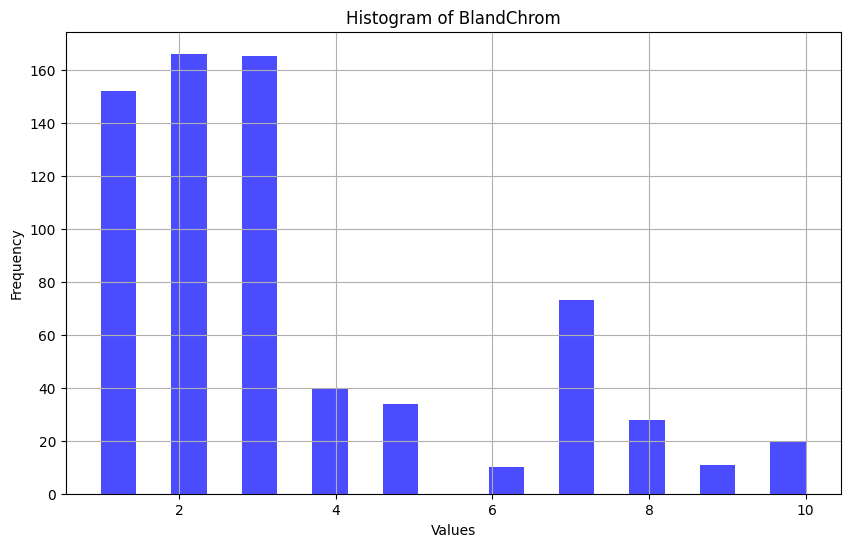

In [7]:
# Data visualization example
plt.figure(figsize=(10, 6))
plt.hist(Cancer_dataset['BlandChrom'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of BlandChrom')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

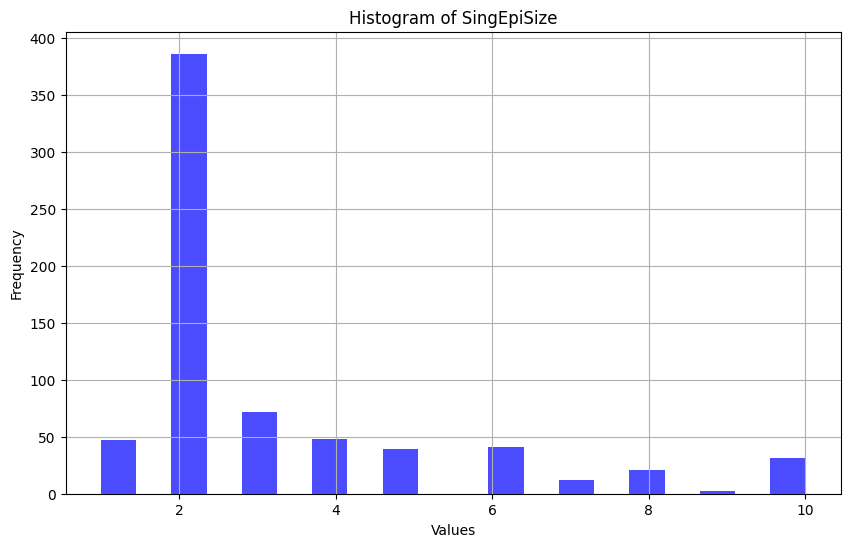

In [9]:
# Data visualization example
plt.figure(figsize=(10, 6))
plt.hist(Cancer_dataset['SingEpiSize'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of SingEpiSize')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Data pre-processing and selection


Let's first look at columns data types:


In [4]:
Cancer_dataset.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:


In [11]:
Cancer_dataset = Cancer_dataset[pd.to_numeric(Cancer_dataset['BareNuc'], errors='coerce').notnull()]
Cancer_dataset['BareNuc'] =Cancer_dataset['BareNuc'].astype('int')
Cancer_dataset.dtypes

<ipython-input-11-0e673f209799>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cancer_dataset['BareNuc'] =Cancer_dataset['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
feature_df = Cancer_dataset[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X_values = np.asarray(feature_df)


We want the model to predict the value of Class (that is, benign (=2) or malignant (=4)).


In [13]:
y_values = np.asarray(Cancer_dataset['Class'])

## Train/Test dataset


We split our dataset into train and test set:


In [14]:
X_train, X_test, y_train, y_test = train_test_split( X_values, y_values, test_size=0.2, random_state=4)
print ('Here is the shape of Train set:', X_train.shape,  y_train.shape)
print ('Here is the shape of Test set:', X_test.shape,  y_test.shape)

Here is the shape of Train set: (546, 9) (546,)
Here is the shape of Test set: (137, 9) (137,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>


In [15]:
from sklearn import svm
classifier_of_rbf = svm.SVC(kernel='rbf')
classifier_of_rbf .fit(X_train, y_train)

SVC()

After being fitted, the model can then be used to predict new values:


In [16]:
yprediction_classifier_of_rbf  = classifier_of_rbf .predict(X_test)
yprediction_classifier_of_rbf [0:5]

array([2, 4, 2, 4, 2])

<h2 id="evaluation">Evaluation</h2>


You can also easily use the __f1_score__ from sklearn library:


In [38]:
from sklearn.metrics import f1_score

f1score_rbf = f1_score(y_test, yprediction_classifier_of_rbf, average='weighted')
print("Here is the f1 score of SVM Classifier with RBF", f1score_rbf)

Here is the f1 score of SVM Classifier with RBF 0.9639038982104676


In [32]:
from sklearn.metrics import accuracy_score

accuracy_rbf = accuracy_score(y_test, yprediction_classifier_of_rbf)
print("Here is the Accuracy score of SVM Classifier with RBF", accuracy_rbf)

Here is the Accuracy score of SVM Classifier with RBF 0.9635036496350365


# SVM with linear Kernel

In [33]:

from sklearn import svm
classifier_of_linear = svm.SVC(kernel='linear')
classifier_of_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
yprediction_classifier_of_linear  = classifier_of_linear.predict(X_test)
yprediction_classifier_of_linear[0:5]

array([2, 4, 2, 4, 2])

In [35]:
from sklearn.metrics import f1_score

f1score_linear= f1_score(y_test, yprediction_classifier_of_linear, average='weighted')
print("Here is the f1 score of SVM Classifier with linear ",f1score_linear)

Here is the f1 score of SVM Classifier with linear  0.9639038982104676


In [36]:
from sklearn.metrics import accuracy_score

accuracy_linear = accuracy_score(y_test, yprediction_classifier_of_linear)
print("Here is the Accuracy score of SVM Classifier with linear", accuracy_linear)

Here is the Accuracy score of SVM Classifier with linear 0.9635036496350365


# Comparison of accuracies of linear and RBF kernel

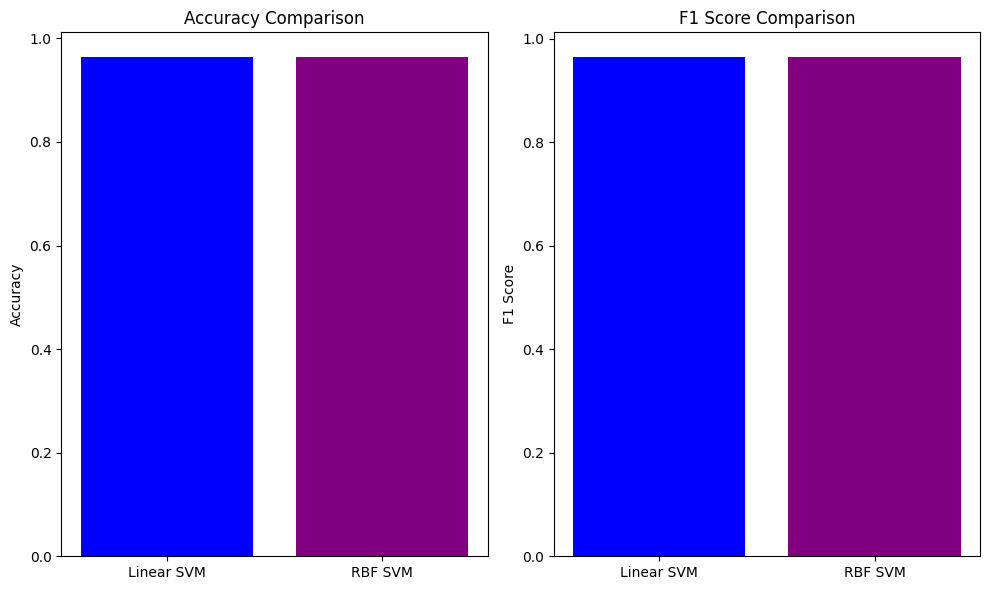

In [40]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracies = [accuracy_linear, accuracy_rbf]

# F1 scores
f1_scores = [f1score_linear, f1score_rbf]

# Labels
labels = ['Linear SVM', 'RBF SVM']

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(labels, accuracies, color=['blue', 'purple'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(labels, f1_scores, color=['blue', 'purple'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()
